# **Primer entrega proyecto final Data Science**

1.   **Descripción del dataset elegido**

El dataset elegido muestra las ventas de los juegos "Maldón". Detalla los vendedores, su reputación, ubicación, tipo de envío, cantidades vendidas, etc. lo que permite realizar un análisis de los productos vendidos por cada vededor.

2.   **Variables potencialmente interesantes para el análisis**

    *   **Producto:** Nombre del juego.
    *   **Precio:** Precio del juego.
    *   **Unidades vendidas:** Cantidad de unidades vendidas del juego por vendedor.
    *   **Nickname:** Identificación del vendedor del juego.
    *   **Condición:** Condición del producto, nuevo o usado.
    *   **Cuotas:** Cantidad de cuotas a las que se vendió el juego.
    *   **Envío gratis:** Descripción si el envío fue gratis o no.
    *   **Días publicados** Cantidad de días que se publicó el juego hasta su venta.

## 1- Configuración del entorno

In [ ]:
# Importación de librerías fundamentales
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librería especializada en visualización de datos ausentes
# Si no está instalada, descomentar y ejecutar la siguiente línea en Colab:
# !pip install missingno
import missingno as msno

# Librerías de Scikit-learn para imputación
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split # Para demostrar buenas prácticas

# Configuraciones adicionales (opcional)
pd.set_option('display.max_columns', None) # Mostrar todas las columnas
sns.set_style('darkgrid') # Estilo de gráficos Seaborn
plt.rcParams['figure.figsize'] = (8, 4) # Tamaño de figuras Matplotlib

##2- Se importa el Dataset elegido en Kaggle

In [ ]:
# Se importa el dataset encontrado en Kaggle

import kagglehub
import os

# Se descarga la última versión
dataset_path = kagglehub.dataset_download("javiersidders/ventas-maldon-en-meli")

# Se obtiene el archivo CSV
csv_file = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]

# Se completa removiendo espacios extra.
file_path = os.path.join(dataset_path, csv_file[0])


In [ ]:
# Mostrar el DataFrame completo
print("DataFrame de Ventas de Juegos Maldon:")
df_maldon = pd.read_csv(file_path)
df_maldon = pd.read_csv(file_path, sep = ';')
df_maldon

DataFrame de Ventas de Juegos Maldon:


,Investiga,Id,Moneda,Precio,Unidades vendidas,Venta Diaria Promedio,IdSeller,Nickname,Stock,Exposicion,T. Oficial,Condición,Cuotas,Envío Gratis,Días publicados,Reputación,Ubicación,Envío Flex,Envío Full
0,Juego De Mesa El Camarero Maldón,MLA924668309,ARS,3330,500,7000,29693465,JUEGOSMALDON,68,Premium,Maldon,Nuevo,6,No,301,Platinum,Capital Federal,Si,Si
1,Juego De Mesa El Erudito Maldón,MLA924669969,ARS,5360,500,11300,29693465,JUEGOSMALDON,17,Premium,Maldon,Nuevo,6,Si,301,Platinum,Capital Federal,Si,Si
2,Juego De Mesa El Ilustrado Maldón,MLA924668610,ARS,5360,200,4400,29693465,JUEGOSMALDON,20,Premium,Maldon,Nuevo,6,Si,301,Platinum,Capital Federal,Si,Si
3,Juego De Mesa Pescadores Maldón,MLA924338255,ARS,3330,100,1200,478972008,DEMAVISIONCOMERCIALSRL,19,Premium,,Nuevo,6,No,303,Platinum,Interior,No,Si
4,Juego De Mesa El Cinéfilo Maldón,MLA924669793,ARS,4730,100,1700,29693465,JUEGOSMALDON,19,Premium,Maldon,Nuevo,6,Si,301,Platinum,Capital Federal,Si,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Juego De Mesa El Switcher De Maldón (15223),MLA915844217,ARS,3455,0,0,128276579,ELPATIO ONLINE,1,Clásica,,Nuevo,12,No,359,1,Capital Federal,No,No
1618,Respuestas Abiertas Imágenes Didactikids,MLA844167183,ARS,1500,1,0,75501715,DIDACTIKIDSONLINE,2,Clásica,,Nuevo,12,No,751,1,Capital Federal,Si,No
1619,El Switcher Juego De Estrategia Ingenio +8 Año...,MLA760729337,ARS,3085,2,0,75501715,DIDACTIKIDSONLINE,1,Clásica,,Nuevo,12,No,1222,1,Capital Federal,Si,No
1620,El Macanudo Juego De Mesa +8 Años Didactikids,MLA760704724,ARS,4660,0,0,75501715,DIDACTIKIDSONLINE,1,Clásica,,Nuevo,12,Si,1222,1,Capital Federal,Si,No


##3- Exploración inicial de los datos, modificación de valores y columnas y agregación de filas

In [ ]:
# Mostrar las primeras 5 filas
print("Primeras 5 filas (.head()):")
df_maldon.head()

Primeras 5 filas (.head()):


,Investiga,Id,Moneda,Precio,Unidades vendidas,Venta Diaria Promedio,IdSeller,Nickname,Stock,Exposicion,T. Oficial,Condición,Cuotas,Envío Gratis,Días publicados,Reputación,Ubicación,Envío Flex,Envío Full
0,Juego De Mesa El Camarero Maldón,MLA924668309,ARS,3330,500,7000,29693465,JUEGOSMALDON,68,Premium,Maldon,Nuevo,6,No,301,Platinum,Capital Federal,Si,Si
1,Juego De Mesa El Erudito Maldón,MLA924669969,ARS,5360,500,11300,29693465,JUEGOSMALDON,17,Premium,Maldon,Nuevo,6,Si,301,Platinum,Capital Federal,Si,Si
2,Juego De Mesa El Ilustrado Maldón,MLA924668610,ARS,5360,200,4400,29693465,JUEGOSMALDON,20,Premium,Maldon,Nuevo,6,Si,301,Platinum,Capital Federal,Si,Si
3,Juego De Mesa Pescadores Maldón,MLA924338255,ARS,3330,100,1200,478972008,DEMAVISIONCOMERCIALSRL,19,Premium,,Nuevo,6,No,303,Platinum,Interior,No,Si
4,Juego De Mesa El Cinéfilo Maldón,MLA924669793,ARS,4730,100,1700,29693465,JUEGOSMALDON,19,Premium,Maldon,Nuevo,6,Si,301,Platinum,Capital Federal,Si,Si


In [ ]:
# Mostrar las últimas 5 filas
print("Últimas 5 filas (.tail(5)):")
df_maldon.tail(5)

Últimas 5 filas (.tail(5)):


,Investiga,Id,Moneda,Precio,Unidades vendidas,Venta Diaria Promedio,IdSeller,Nickname,Stock,Exposicion,T. Oficial,Condición,Cuotas,Envío Gratis,Días publicados,Reputación,Ubicación,Envío Flex,Envío Full
1617,Juego De Mesa El Switcher De Maldón (15223),MLA915844217,ARS,3455,0,0,128276579,ELPATIO ONLINE,1,Clásica,,Nuevo,12,No,359,1,Capital Federal,No,No
1618,Respuestas Abiertas Imágenes Didactikids,MLA844167183,ARS,1500,1,0,75501715,DIDACTIKIDSONLINE,2,Clásica,,Nuevo,12,No,751,1,Capital Federal,Si,No
1619,El Switcher Juego De Estrategia Ingenio +8 Año...,MLA760729337,ARS,3085,2,0,75501715,DIDACTIKIDSONLINE,1,Clásica,,Nuevo,12,No,1222,1,Capital Federal,Si,No
1620,El Macanudo Juego De Mesa +8 Años Didactikids,MLA760704724,ARS,4660,0,0,75501715,DIDACTIKIDSONLINE,1,Clásica,,Nuevo,12,Si,1222,1,Capital Federal,Si,No
1621,El Futbolero - Maldón - Juego De Mesa,MLA769676879,ARS,4620,0,0,310984161,MI.PEQUEÑO.PATIO,1,Clásica,,Nuevo,12,Si,1156,1,GBA,No,No


In [ ]:
# Se obtiene la forma, tamaño y tipos de datos del dataframe
print (df_maldon.shape)
print (df_maldon.size)
print (df_maldon.dtypes)

(1622, 19)
30818
Investiga                object
Id                       object
Moneda                   object
Precio                    int64
Unidades vendidas         int64
Venta Diaria Promedio     int64
IdSeller                  int64
Nickname                 object
Stock                     int64
Exposicion               object
T. Oficial               object
Condición                object
Cuotas                    int64
Envío Gratis             object
Días publicados           int64
Reputación               object
Ubicación                object
Envío Flex               object
Envío Full               object
dtype: object


In [ ]:
# Se reemplazan los valores de la columna 'T. Oficial' por Oficial y Otros.
df_maldon['T. Oficial'] = df_maldon['T. Oficial'].replace({'Maldon': 'Oficial', ' ': 'Otros', '**':'Vendedor Oficial' })
df_maldon['T. Oficial'].groupby(df_maldon['T. Oficial']).count()

# Se reemplazan los valores de la columna 'T. Oficial' que no son 'Oficial' u 'Otros' por 'Vendedor Oficial'
df_maldon['T. Oficial'] = df_maldon['T. Oficial'].apply(lambda x: x if x in ['Oficial', 'Otros'] else 'Vendedor Oficial')

# Se agrupa el resultado por 'T. Oficial' y se cuentan
grouped_df = df_maldon.groupby('T. Oficial').size().reset_index(name='Count')

(grouped_df)

,T. Oficial,Count
0,Oficial,39
1,Otros,1444
2,Vendedor Oficial,139


In [ ]:
# Se cambia el nombre de la columna "Investiga" por el nuevo nombre "Producto"
df = df_maldon.rename(columns={'Investiga': 'Producto'})

In [ ]:
# Se verifica que se haya cambiado el nombre de la columna y se visulizan todas las columnas disponibles
print(f"\nColumnas: {df.columns.tolist()}")


Columnas: ['Producto', 'Id', 'Moneda', 'Precio', 'Unidades vendidas', 'Venta Diaria Promedio', 'IdSeller', 'Nickname', 'Stock', 'Exposicion', 'T. Oficial', 'Condición', 'Cuotas', 'Envío Gratis', 'Días publicados', 'Reputación', 'Ubicación', 'Envío Flex', 'Envío Full']


In [ ]:
# Agregamos 500 filas copiadas aleatoriamente del df original para cumplir el requisito de las 2000 filas como mínimo que tiene que tener el dataset elegido

# Sample 500 random rows with replacement (allowing duplicates)
random_rows = df.sample(n=500, replace=True)

# Concatenate the original DataFrame and the sampled rows
df_maldon = pd.concat([df, random_rows], ignore_index=True)
df_maldon

,Producto,Id,Moneda,Precio,Unidades vendidas,Venta Diaria Promedio,IdSeller,Nickname,Stock,Exposicion,T. Oficial,Condición,Cuotas,Envío Gratis,Días publicados,Reputación,Ubicación,Envío Flex,Envío Full
0,Juego De Mesa El Camarero Maldón,MLA924668309,ARS,3330,500,7000,29693465,JUEGOSMALDON,68,Premium,Oficial,Nuevo,6,No,301,Platinum,Capital Federal,Si,Si
1,Juego De Mesa El Erudito Maldón,MLA924669969,ARS,5360,500,11300,29693465,JUEGOSMALDON,17,Premium,Oficial,Nuevo,6,Si,301,Platinum,Capital Federal,Si,Si
2,Juego De Mesa El Ilustrado Maldón,MLA924668610,ARS,5360,200,4400,29693465,JUEGOSMALDON,20,Premium,Oficial,Nuevo,6,Si,301,Platinum,Capital Federal,Si,Si
3,Juego De Mesa Pescadores Maldón,MLA924338255,ARS,3330,100,1200,478972008,DEMAVISIONCOMERCIALSRL,19,Premium,Otros,Nuevo,6,No,303,Platinum,Interior,No,Si
4,Juego De Mesa El Cinéfilo Maldón,MLA924669793,ARS,4730,100,1700,29693465,JUEGOSMALDON,19,Premium,Oficial,Nuevo,6,Si,301,Platinum,Capital Federal,Si,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,Combo Juego De Mesa El Señor Dix + El Benjamin...,MLA1121132611,ARS,3515,0,0,923694,.MAGIC4EVER,1998,Clásica,Otros,Nuevo,12,No,68,Platinum,Capital Federal,Si,No
2118,El Cinéfilo (maldón) - El Perro Verde J,MLA1127374169,ARS,4730,0,0,79963725,ELPERROVERDEJUEGOS,1,Clásica,Otros,Nuevo,12,Si,26,Platinum,Capital Federal,No,No
2119,Juego De Mesa Cartas Robots Original Maldon Mu...,MLA900623108,ARS,3330,5,40,148114094,MUNDO MANIAS,7,Clásica,Otros,Nuevo,12,No,482,Platinum,Capital Federal,Si,No
2120,Juego De Mesa La Macarena Original Maldon,MLA927199263,ARS,3330,0,0,137081041,ELMUNDODELJUG,22,Clásica,Vendedor Oficial,Nuevo,12,No,284,Platinum,Capital Federal,Si,No


In [ ]:
# Ver las dimensiones del DataFrame (filas, columnas)
print(f"\nDimensiones del DataFrame: {df_maldon.shape}")


Dimensiones del DataFrame: (2122, 19)


In [ ]:
df_maldon.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122 entries, 0 to 2121
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Producto               2122 non-null   object
 1   Id                     2122 non-null   object
 2   Moneda                 2122 non-null   object
 3   Precio                 2122 non-null   int64 
 4   Unidades vendidas      2122 non-null   int64 
 5   Venta Diaria Promedio  2122 non-null   int64 
 6   IdSeller               2122 non-null   int64 
 7   Nickname               2122 non-null   object
 8   Stock                  2122 non-null   int64 
 9   Exposicion             2122 non-null   object
 10  T. Oficial             2122 non-null   object
 11  Condición              2122 non-null   object
 12  Cuotas                 2122 non-null   int64 
 13  Envío Gratis           2122 non-null   object
 14  Días publicados        2122 non-null   int64 
 15  Reputación           

In [ ]:
# Obtener estadísticas descriptivas básicas para las columnas numéricas
print("\nEstadísticas Descriptivas:")
df_maldon[['Precio', 'Unidades vendidas', 'Venta Diaria Promedio', 'Stock', 'Cuotas', 'Días publicados']].describe()


Estadísticas Descriptivas:


,Precio,Unidades vendidas,Venta Diaria Promedio,Stock,Cuotas,Días publicados
count,2122.000000,2122.000000,2122.000000,2122.000000,2122.000000,2122.000000
mean,4930.391612,11.352498,148.251649,397.322337,11.131951,451.195570
std,2429.837174,57.160487,906.806213,798.258539,2.228470,487.941294
min,250.000000,0.000000,0.000000,1.000000,3.000000,2.000000
25%,3330.000000,0.000000,0.000000,1.000000,12.000000,106.000000
50%,4730.000000,0.000000,0.000000,4.000000,12.000000,284.000000
75%,5800.000000,5.000000,40.000000,13.000000,12.000000,648.000000
max,20185.000000,500.000000,13200.000000,2996.000000,12.000000,2251.000000


##4- Identificación de datos ausente

In [ ]:
# Contar valores nulos por columna
print("Conteo de valores nulos por columna:")
print(df_maldon.isnull().sum())

# Calcular el porcentaje de valores nulos por columna
print("\nPorcentaje de valores nulos por columna:")
print((df_maldon.isnull().sum() / len(df)) * 100)

Conteo de valores nulos por columna:
Producto                 0
Id                       0
Moneda                   0
Precio                   0
Unidades vendidas        0
Venta Diaria Promedio    0
IdSeller                 0
Nickname                 0
Stock                    0
Exposicion               0
T. Oficial               0
Condición                0
Cuotas                   0
Envío Gratis             0
Días publicados          0
Reputación               6
Ubicación                6
Envío Flex               6
Envío Full               6
dtype: int64

Porcentaje de valores nulos por columna:
Producto                 0.000000
Id                       0.000000
Moneda                   0.000000
Precio                   0.000000
Unidades vendidas        0.000000
Venta Diaria Promedio    0.000000
IdSeller                 0.000000
Nickname                 0.000000
Stock                    0.000000
Exposicion               0.000000
T. Oficial               0.000000
Condición            

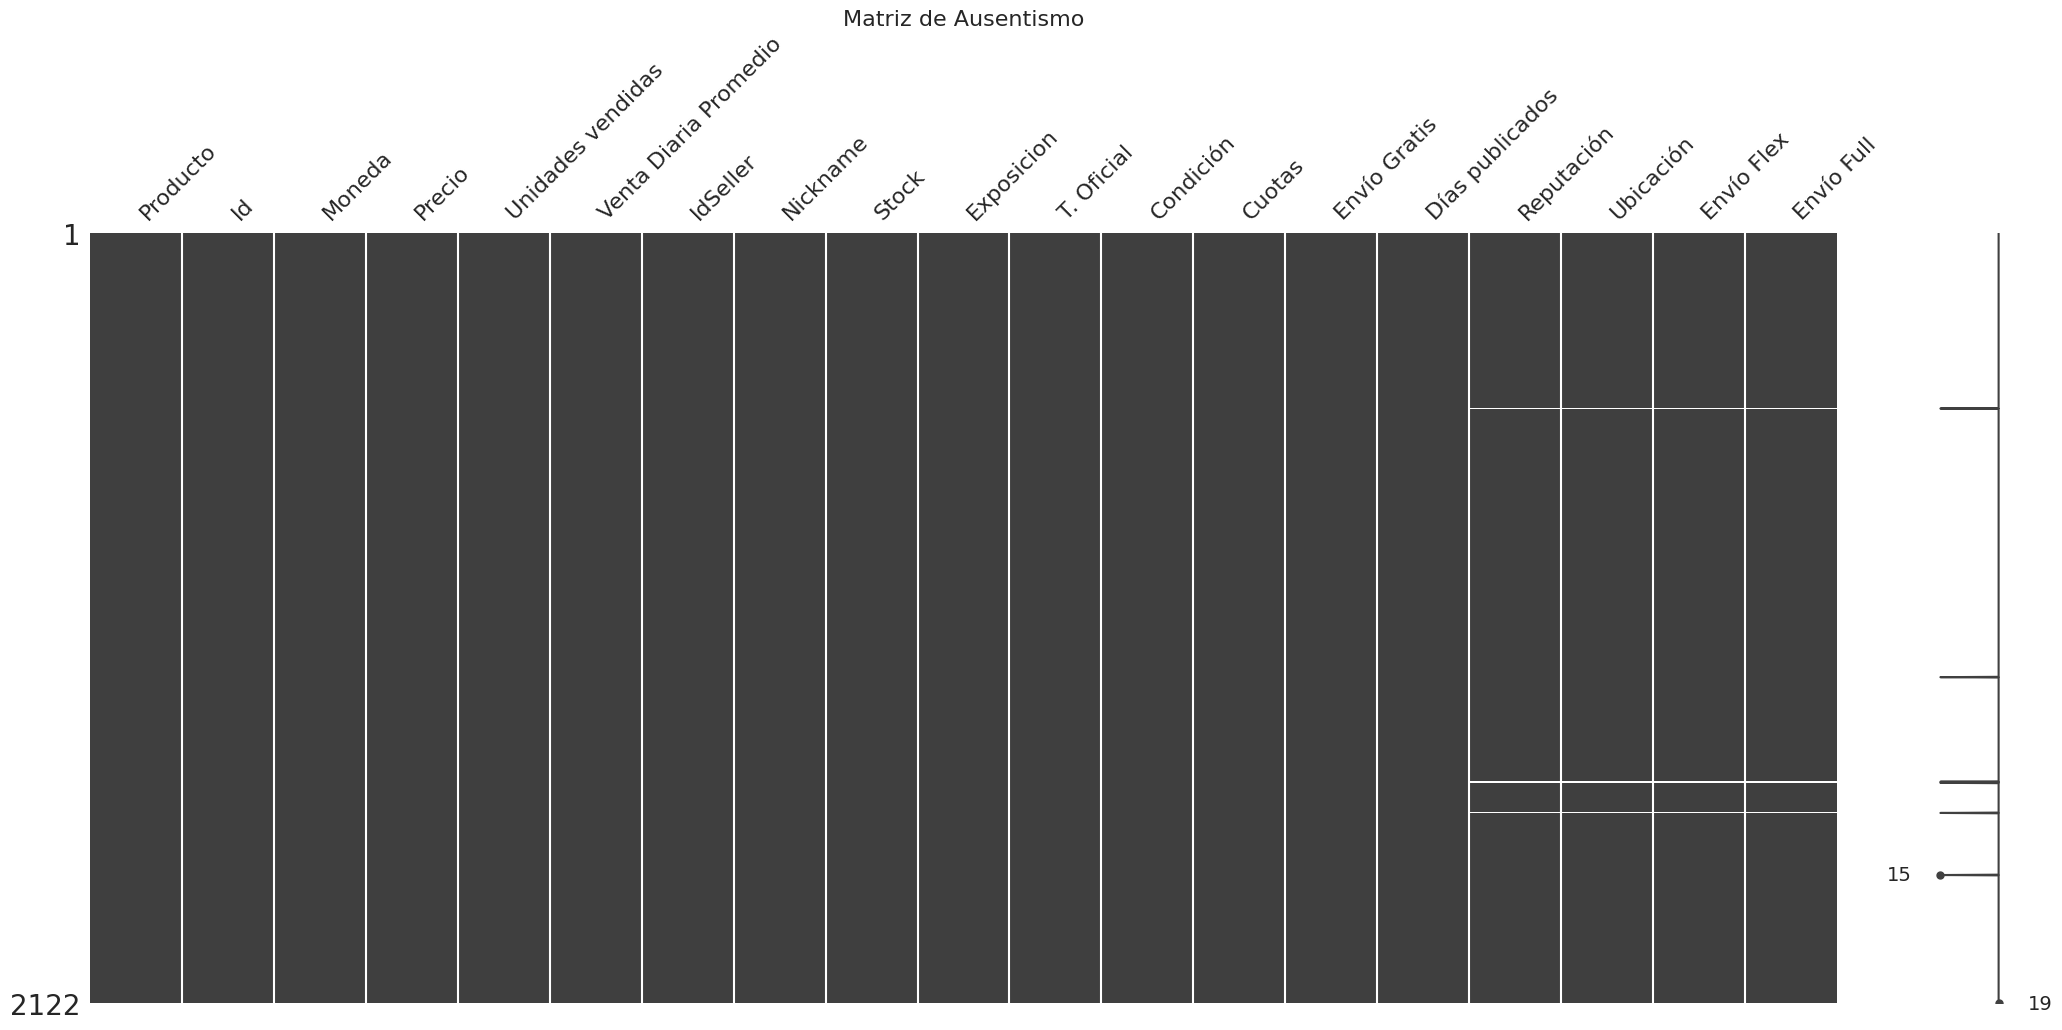

In [ ]:
# Matriz de ausentismo: visualiza la ubicación de los NaN
msno.matrix(df_maldon)
plt.title('Matriz de Ausentismo', fontsize=16)
plt.show()

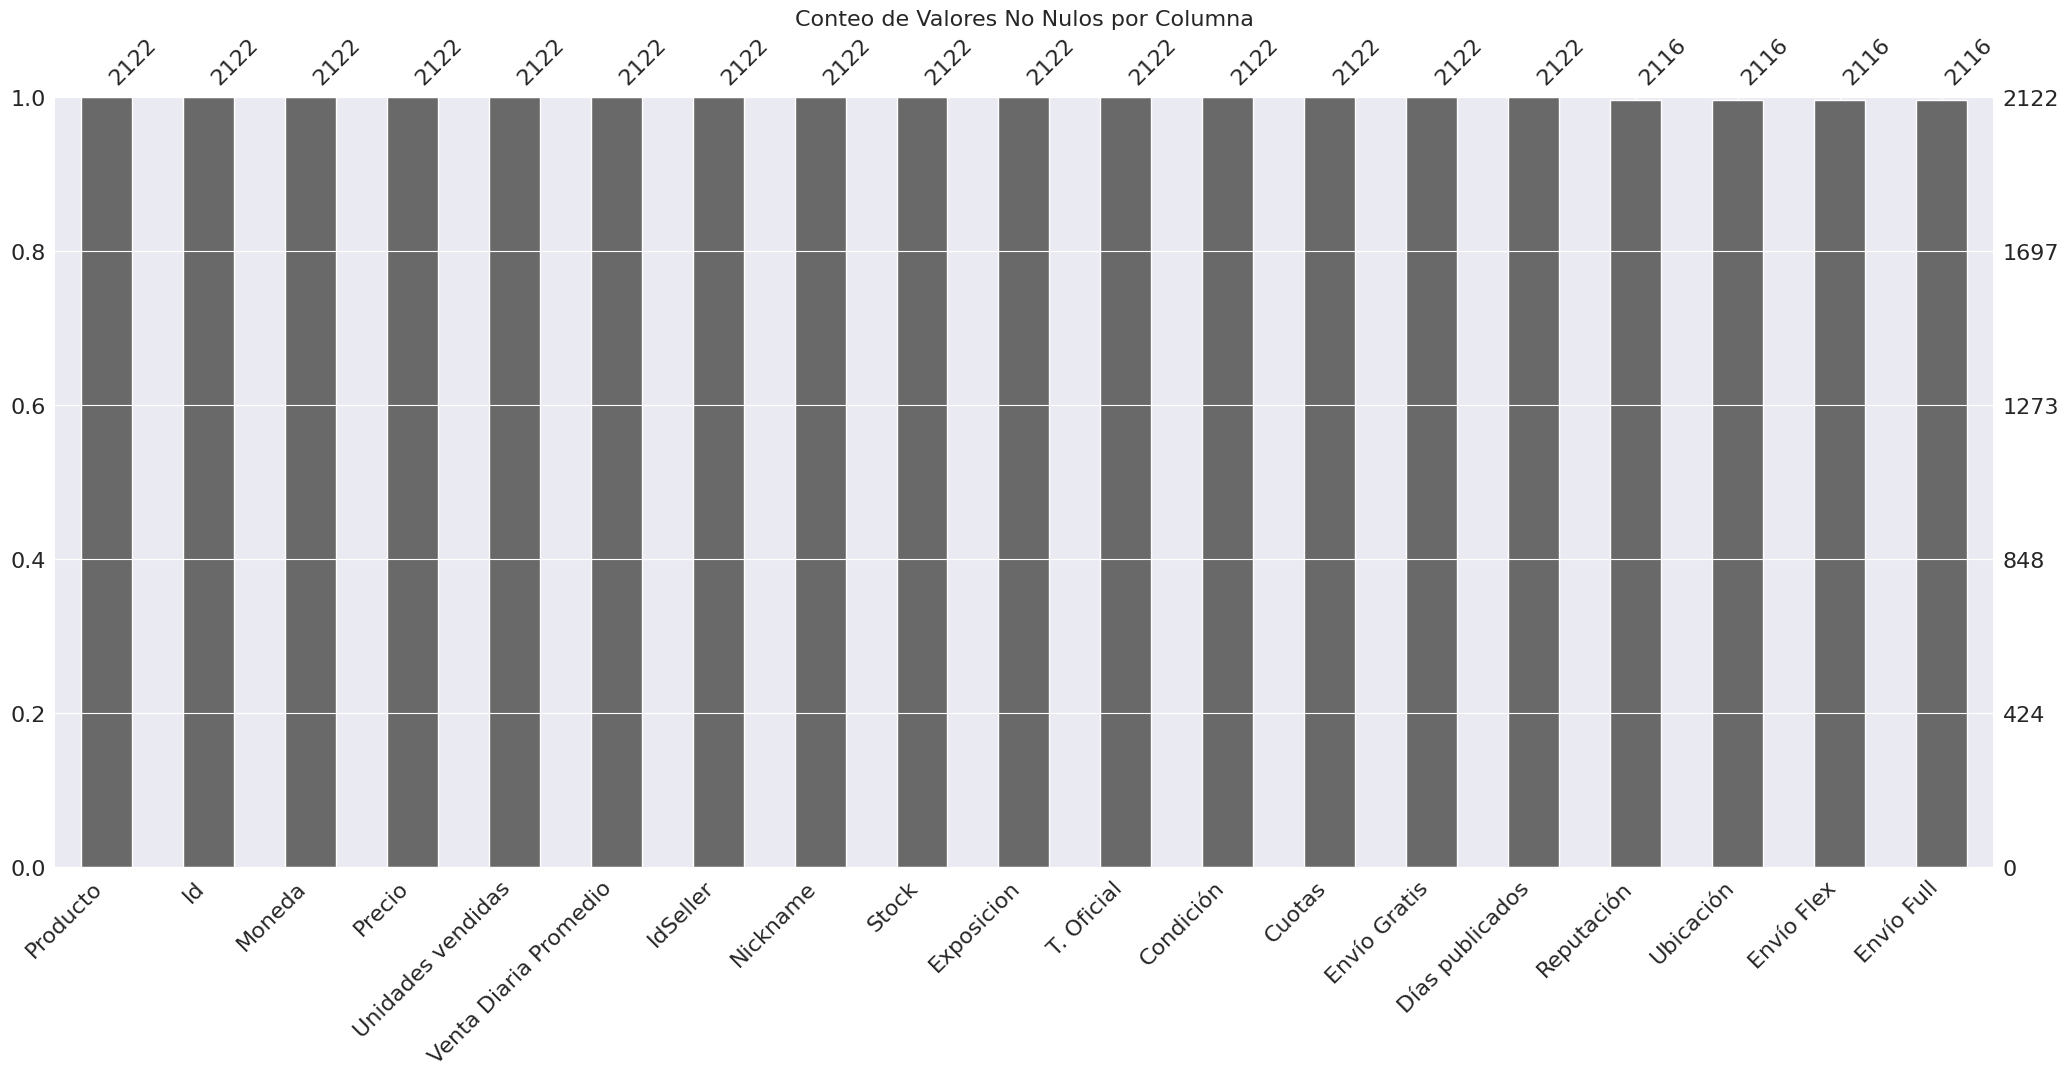

In [ ]:
# Gráfico de barras de ausentismo: similar a .isnull().sum() pero gráfico
msno.bar(df_maldon)
plt.title('Conteo de Valores No Nulos por Columna', fontsize=16)
plt.show()

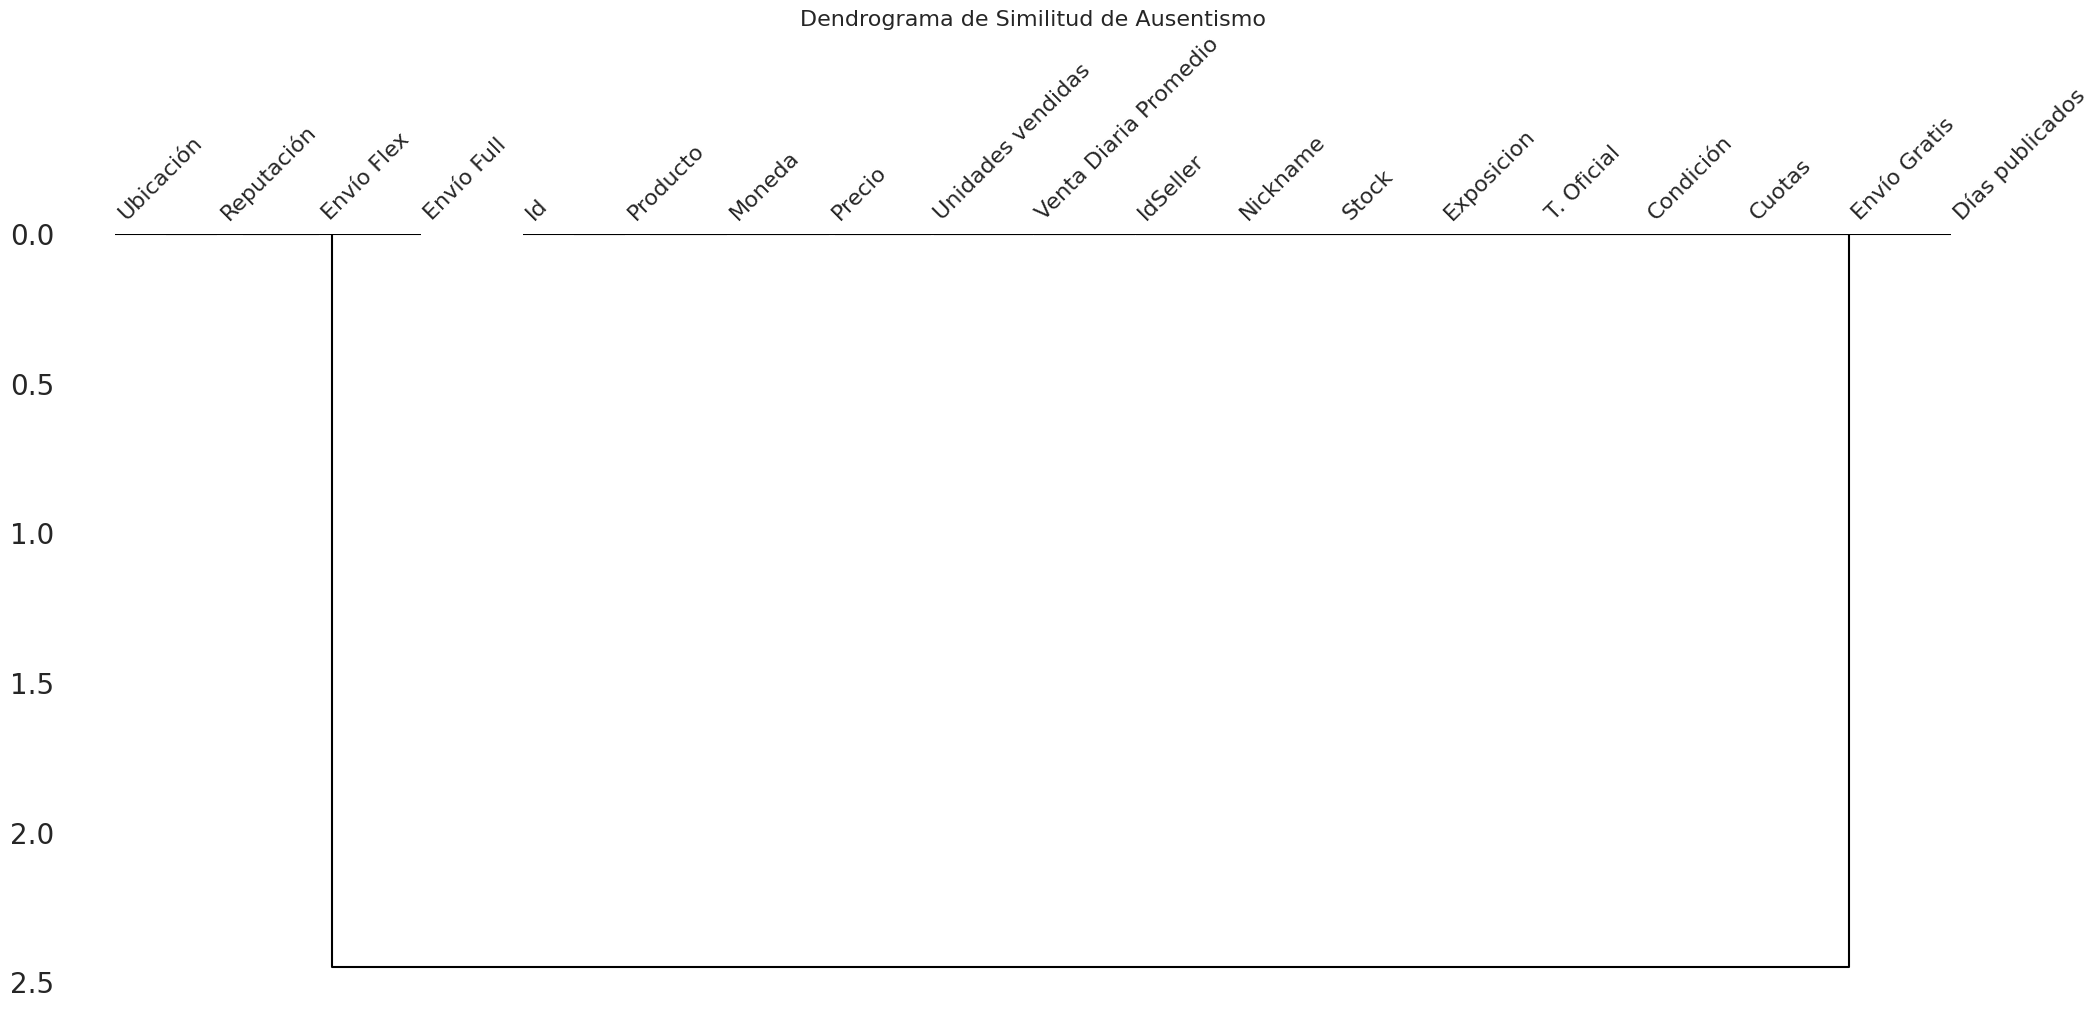

In [ ]:
# Dendrograma: Agrupa columnas que tienen patrones de ausentismo similares.
msno.dendrogram(df_maldon)
plt.title('Dendrograma de Similitud de Ausentismo', fontsize=16)
plt.show()

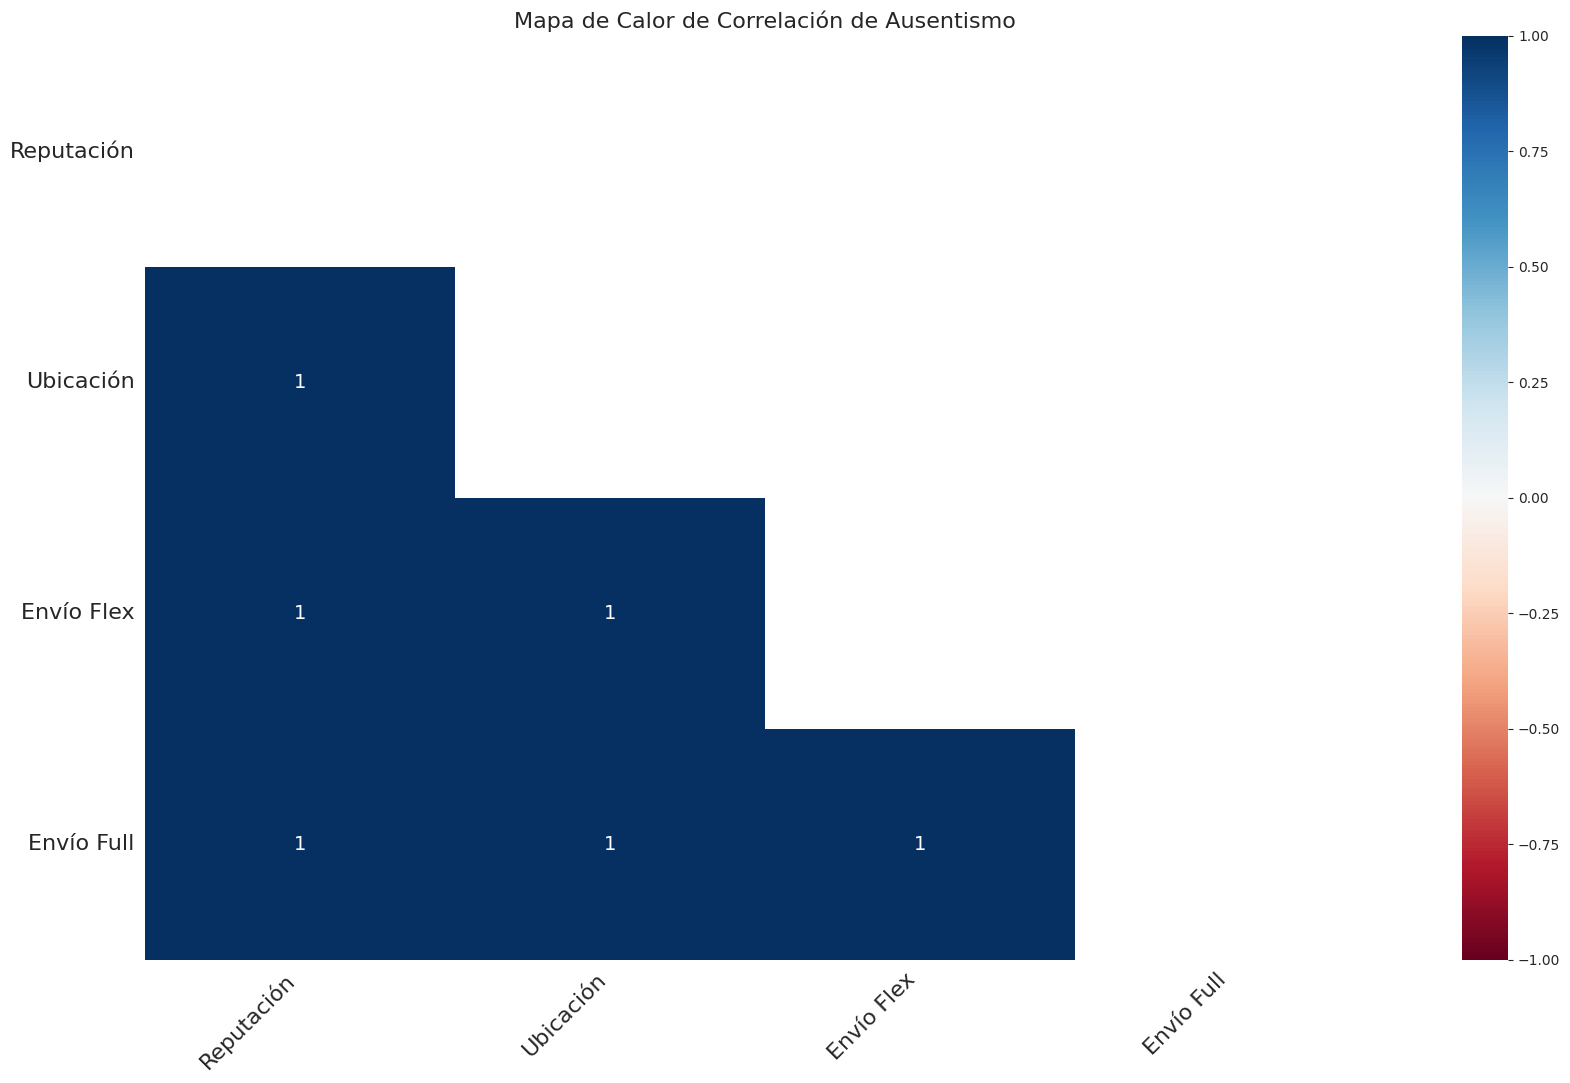

In [ ]:
# Mapa de calor de correlación de ausentismo:
# Muestra si la ausencia de valor en una variable se relaciona con la ausencia en otra.
# Una correlación cercana a 1 significa que si falta un dato en A, es muy probable que falte en B.
# Una correlación cercana a -1 significa que si falta un dato en A, es muy probable que NO falte en B.
# Cerca de 0 indica poca relación lineal en la ausentismo.
msno.heatmap(df_maldon)
plt.title('Mapa de Calor de Correlación de Ausentismo', fontsize=16)
plt.show()

##5- Estrategia de eliminación por columnas

Se aplica esta estrategia para el tratamiento de los datos ausentes ya que la cantidad y porcentaje de los mismos es muy poco significativa en proporción con el total de datos del data frame.
Es dable mencionar también, que los datos ausentes se encuentran en las columnas Reputación, Úbicación, Envío flex y Envío Full que no son relevantes para el análisis que queremos realizar.
Por último se observa que existe una correlación cercana a 1 entre los datos ausentes, es decir, que la falta de uno de los datos en una fila implica la falta de los demás en la misma.

In [ ]:
# Crear una copia
df_maldon2 = df.copy()

# Definir un umbral (ej. 0.3% de valores ausentes)
umbral = 0.003 * len(df_maldon2)

# Eliminar columnas con más del 0.3% de NaN
df_eliminado_cols = df_maldon2.dropna(thresh=umbral, axis=1)

# Identificar columnas a eliminar
columnas_a_eliminar = df_maldon2.columns[df_maldon2.isnull().sum() > umbral]
print("Columnas a eliminar (más del 0.3% de NaN):", columnas_a_eliminar.tolist())

# Eliminar las columnas identificadas
df_maldon2.drop(columns=columnas_a_eliminar, inplace=True)

print("\nTamaño del DataFrame original:", df_maldon.shape)
print("Tamaño después de eliminar columnas con >0.3% NaN:", df_maldon2.shape)
print("\nDataFrame resultante:")
df_maldon2.head() # Mostrar solo las primeras filas

Columnas a eliminar (más del 0.3% de NaN): ['Reputación', 'Ubicación', 'Envío Flex', 'Envío Full']

Tamaño del DataFrame original: (2122, 19)
Tamaño después de eliminar columnas con >0.3% NaN: (1622, 15)

DataFrame resultante:


,Producto,Id,Moneda,Precio,Unidades vendidas,Venta Diaria Promedio,IdSeller,Nickname,Stock,Exposicion,T. Oficial,Condición,Cuotas,Envío Gratis,Días publicados
0,Juego De Mesa El Camarero Maldón,MLA924668309,ARS,3330,500,7000,29693465,JUEGOSMALDON,68,Premium,Oficial,Nuevo,6,No,301
1,Juego De Mesa El Erudito Maldón,MLA924669969,ARS,5360,500,11300,29693465,JUEGOSMALDON,17,Premium,Oficial,Nuevo,6,Si,301
2,Juego De Mesa El Ilustrado Maldón,MLA924668610,ARS,5360,200,4400,29693465,JUEGOSMALDON,20,Premium,Oficial,Nuevo,6,Si,301
3,Juego De Mesa Pescadores Maldón,MLA924338255,ARS,3330,100,1200,478972008,DEMAVISIONCOMERCIALSRL,19,Premium,Otros,Nuevo,6,No,303
4,Juego De Mesa El Cinéfilo Maldón,MLA924669793,ARS,4730,100,1700,29693465,JUEGOSMALDON,19,Premium,Oficial,Nuevo,6,Si,301


##6- Hipotesis del Proyecto

**Hipótesis Nula (H0):** Las ventas realizadas por vendedores oficiales y Maldon en mayor cantidad de cuotas y con envío gratis requieren en promedio un menor tiempo de publicación.


##7- Operaciones sobre el dataframe

In [ ]:
# Calcular promedio de días publicados por Nickname
df_maldon2['Promedio Días Publicados por Nickname'] = df_maldon2.groupby('Nickname')['Días publicados'].transform('mean')

# Display 'Nickname' y promedio de días publicados
promedio_dias_por_Nickname = df_maldon2[['Nickname', 'Promedio Días Publicados por Nickname']].drop_duplicates()
(promedio_dias_por_Nickname)

,Nickname,Promedio Días Publicados por Nickname
0,JUEGOSMALDON,665.538462
3,DEMAVISIONCOMERCIALSRL,535.160000
6,CASA VALENTE,441.707317
16,GIRODIDACTICO.CABALLITOPALERMO,641.888889
31,ELMUNDODELJUG,142.620690
...,...,...
1601,GAJO7043307,11.000000
1602,DIDACTIKIDSONLINE,910.250000
1603,ELPATIO ONLINE,688.000000
1604,CIUDADRAYUELA,321.083333


In [ ]:
# Calcular promedio de días publicados por T. Oficial
df_maldon2['Promedio Días Publicados por T. Oficial'] = df_maldon2.groupby('T. Oficial')['Días publicados'].transform('mean')

# Display 'T. Oficial' y promedio días publicados
promedio_dias_por_Oficial = df_maldon2[['T. Oficial', 'Promedio Días Publicados por T. Oficial']].drop_duplicates()
(promedio_dias_por_Oficial)

,T. Oficial,Promedio Días Publicados por T. Oficial
0,Oficial,665.538462
3,Otros,443.191828
31,Vendedor Oficial,520.863309


In [ ]:
# Calcular promedio de días publicados por Envío Gratis
df_maldon2['Promedio Días Publicados por Envío Gratis'] = df_maldon2.groupby('Envío Gratis')['Días publicados'].transform('mean')

# Display 'Envío Gratis' y promedio días publicados
promedio_dias_por_Envío_Gratis = df_maldon2[['Envío Gratis', 'Promedio Días Publicados por Envío Gratis']].drop_duplicates()
(promedio_dias_por_Envío_Gratis)

,Envío Gratis,Promedio Días Publicados por Envío Gratis
0,No,421.255887
1,Si,477.142132


In [ ]:
#Calcular promedio de días publicados por Cuotas
df_maldon2['Promedio Días Publicados por Cuotas'] = df_maldon2.groupby('Cuotas')['Días publicados'].transform('mean')

# Display 'Cuotas' y promedio días publicados por
promedio_dias_por_Cuotas = df_maldon2[['Cuotas', 'Promedio Días Publicados por Cuotas']].drop_duplicates()
(promedio_dias_por_Cuotas)

,Cuotas,Promedio Días Publicados por Cuotas
0,6,491.785714
6,12,444.931721
92,3,683.705882


In [ ]:
(df_maldon2).head()

,Producto,Id,Moneda,Precio,Unidades vendidas,Venta Diaria Promedio,IdSeller,Nickname,Stock,Exposicion,T. Oficial,Condición,Cuotas,Envío Gratis,Días publicados,Promedio Días Publicados por Nickname,Promedio Días Publicados por T. Oficial,Promedio Días Publicados por Envío Gratis,Promedio Días Publicados por Cuotas
0,Juego De Mesa El Camarero Maldón,MLA924668309,ARS,3330,500,7000,29693465,JUEGOSMALDON,68,Premium,Oficial,Nuevo,6,No,301,665.538462,665.538462,421.255887,491.785714
1,Juego De Mesa El Erudito Maldón,MLA924669969,ARS,5360,500,11300,29693465,JUEGOSMALDON,17,Premium,Oficial,Nuevo,6,Si,301,665.538462,665.538462,477.142132,491.785714
2,Juego De Mesa El Ilustrado Maldón,MLA924668610,ARS,5360,200,4400,29693465,JUEGOSMALDON,20,Premium,Oficial,Nuevo,6,Si,301,665.538462,665.538462,477.142132,491.785714
3,Juego De Mesa Pescadores Maldón,MLA924338255,ARS,3330,100,1200,478972008,DEMAVISIONCOMERCIALSRL,19,Premium,Otros,Nuevo,6,No,303,535.160000,443.191828,421.255887,491.785714
4,Juego De Mesa El Cinéfilo Maldón,MLA924669793,ARS,4730,100,1700,29693465,JUEGOSMALDON,19,Premium,Oficial,Nuevo,6,Si,301,665.538462,665.538462,477.142132,491.785714


In [ ]:
# Calcular promedio de días publicados por T. Oficial, Cuotas y Envío Gratis
promedio_dias_publicados = df_maldon2.groupby(['T. Oficial', 'Cuotas', 'Envío Gratis'])['Días publicados'].mean().reset_index()

# Renombrar la columna 'Días publicados' por 'Promedio Días Publicados'
promedio_dias_publicados = promedio_dias_publicados.rename(columns={'Días publicados': 'Promedio Días Publicados'})

# Display el resultado
(promedio_dias_publicados)

,T. Oficial,Cuotas,Envío Gratis,Promedio Días Publicados
0,Oficial,6,No,718.352941
1,Oficial,6,Si,844.285714
2,Oficial,12,No,353.333333
3,Oficial,12,Si,172.800000
4,Otros,3,No,611.900000
5,Otros,3,Si,730.000000
6,Otros,6,No,472.404255
7,Otros,6,Si,436.959184
8,Otros,12,No,416.212371
9,Otros,12,Si,448.363636


##8- Visualizaciones con Matplotlib

###A) Gráfico de línea

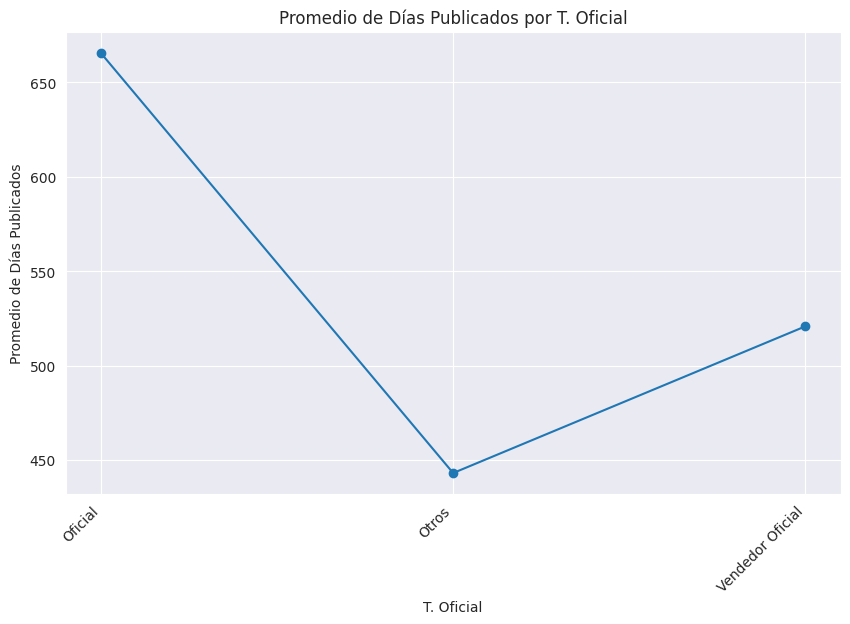

In [ ]:
# Calcular el promedio de días publicados por cada T. Oficial
avg_dias_publicados = df_maldon2.groupby('T. Oficial')['Días publicados'].mean().reset_index()

# Crear la line plot
plt.figure(figsize=(10, 6))
plt.plot(avg_dias_publicados['T. Oficial'], avg_dias_publicados['Días publicados'], marker='o')

# Ajustes del plot
plt.title('Promedio de Días Publicados por T. Oficial')
plt.xlabel('T. Oficial')
plt.ylabel('Promedio de Días Publicados')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.grid(True)  # Add grid lines (optional)

plt.show()  # Display plot

###B) Gráfico de Barra

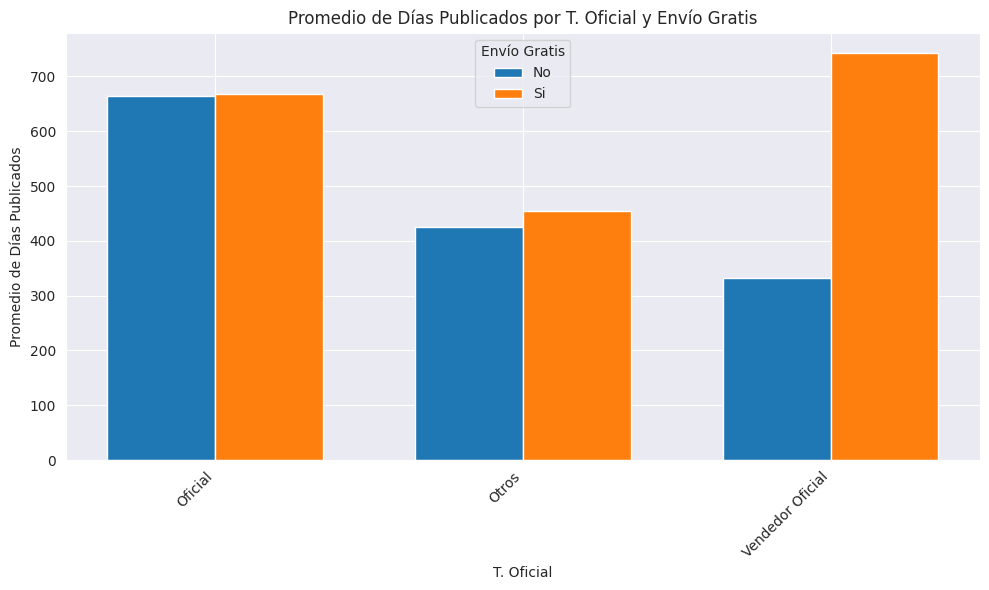

In [ ]:
# Calcular promedio de días de publicación
avg_dias_publicados = df_maldon2.groupby(['T. Oficial', 'Envío Gratis'])['Días publicados'].mean().reset_index()

# Obtener valores únicos para 'T. Oficial' and 'Envío Gratis'
oficiales = avg_dias_publicados['T. Oficial'].unique()
envios = avg_dias_publicados['Envío Gratis'].unique()

# Ajustar ancho de la barra
bar_width = 0.35

# Posicionar la barra de acuerdo a cada T. Oficial
x_pos = np.arange(len(oficiales))

# Crear barras para cada 'Envío Gratis' vinculado con cada 'T. Oficial'
fig, ax = plt.subplots(figsize=(10, 6))
for i, envio in enumerate(envios):
    # Filtrar datos para 'Envío Gratis'
    envio_data = avg_dias_publicados[avg_dias_publicados['Envío Gratis'] == envio]

    # Obtener días promedio publicados para'Envío Gratis'
    dias_publicados = envio_data['Días publicados'].values

    # Crear barras con posición ajustada para evitar superposisición
    ax.bar(x_pos + i * bar_width, dias_publicados, bar_width, label=envio)

# Set x-axis ticks and labels
ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels(oficiales, rotation=45, ha='right')

# Ajustar el plot
ax.set_title('Promedio de Días Publicados por T. Oficial y Envío Gratis')
ax.set_xlabel('T. Oficial')
ax.set_ylabel('Promedio de Días Publicados')
ax.legend(title='Envío Gratis')

plt.tight_layout()
plt.show()

###C) Gráfico de Torta

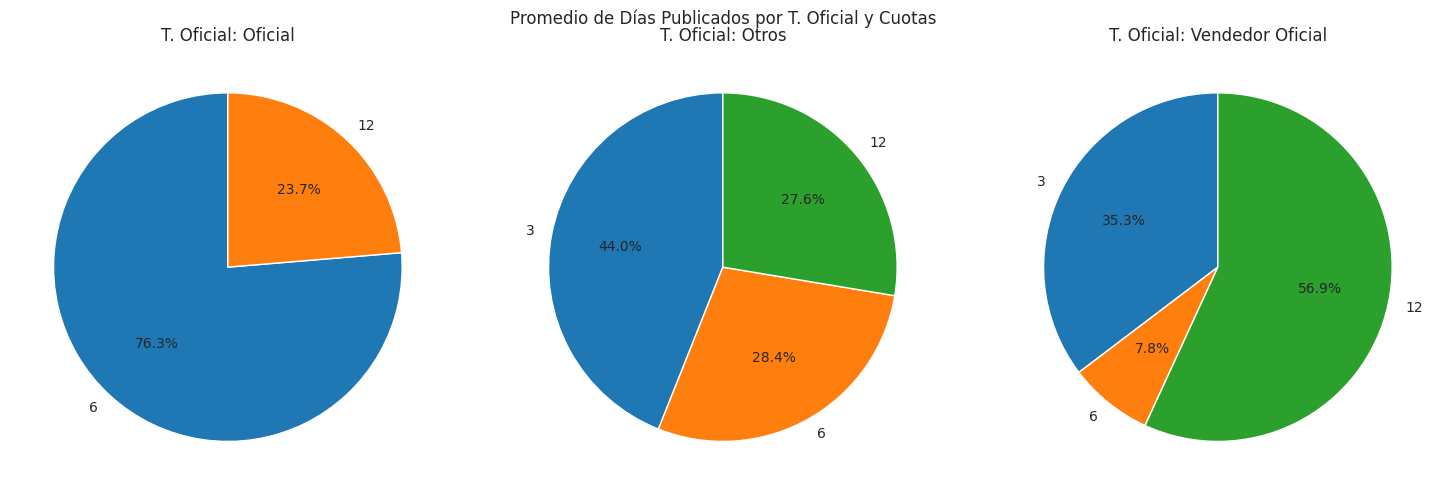

In [ ]:
# Calcular promedio de días publicados por T. Oficial y Cuotas
avg_dias_publicados = df_maldon2.groupby(['T. Oficial', 'Cuotas'])['Días publicados'].mean().reset_index()

# Obtener el único valor para T. Oficial
oficiales = avg_dias_publicados['T. Oficial'].unique()

# Crear un gráfico de torta para cada T. Oficial
fig, axes = plt.subplots(1, len(oficiales), figsize=(15, 5))  # 1 row, len(oficiales) columns
fig.suptitle('Promedio de Días Publicados por T. Oficial y Cuotas')

for i, oficial in enumerate(oficiales):
    ax = axes[i]  # Obtener subplot

    # Filtrar datos
    data_oficial = avg_dias_publicados[avg_dias_publicados['T. Oficial'] == oficial]

    # Obtener cuotas y días promedio publicados
    cuotas = data_oficial['Cuotas']
    dias_publicados = data_oficial['Días publicados']

    # Crear el gráfico de torta
    ax.pie(dias_publicados, labels=cuotas, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'T. Oficial: {oficial}')

plt.tight_layout()
plt.show()

##9- Visualizaciones con seaborn

###A) Box Plot

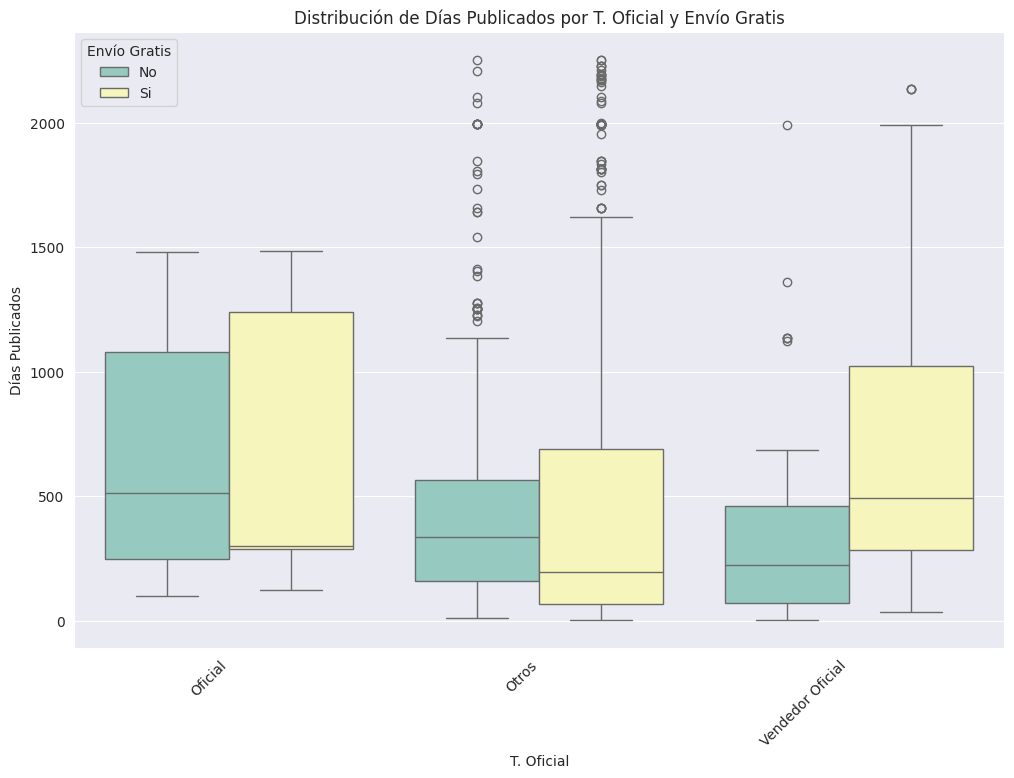

In [ ]:
# Crear el gráfico de caja
plt.figure(figsize=(12, 8))  # Ajustar el tamaño

sns.boxplot(x='T. Oficial',
            y='Días publicados',
            hue='Envío Gratis',  # Usar distintos colores para envío gratis para diferenciarlo en cadad caja
            data=df_maldon2,  # Usar el dataframe completo
            palette='Set3')  # Seleccionar el color de la paleta

# Ajustar plot
plt.title('Distribución de Días Publicados por T. Oficial y Envío Gratis')
plt.xlabel('T. Oficial')
plt.ylabel('Días Publicados')
plt.xticks(rotation=45, ha='right')

plt.show()  # Display plot

###B) Gráfico de Violín

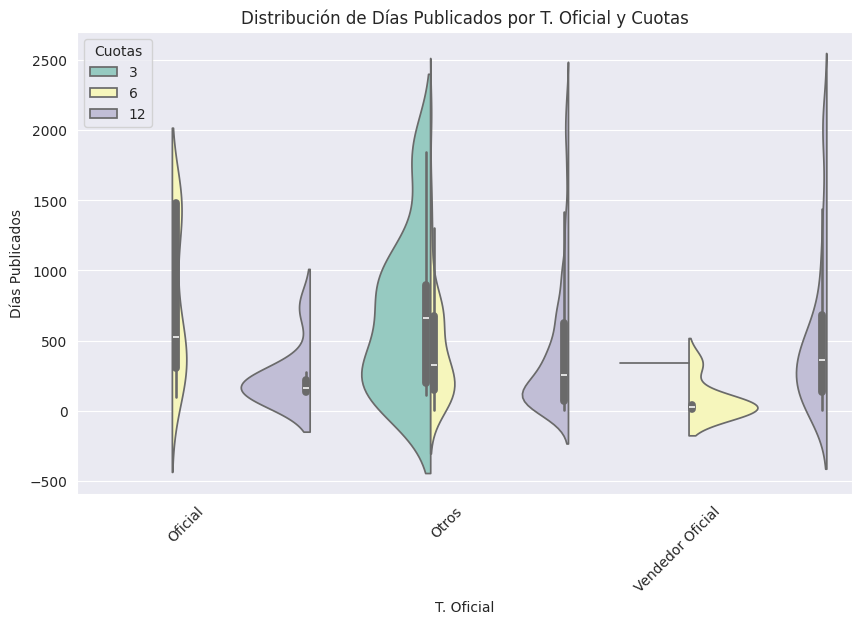

In [ ]:
# Crear gráfico de Violín
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura

sns.violinplot(x='T. Oficial',
               y='Días publicados',
               hue='Cuotas',
               data=df_maldon2,
               palette='Set3',  # Elegir paleta de colores
               split=True)

# Ajustar plot
plt.title('Distribución de Días Publicados por T. Oficial y Cuotas')
plt.xlabel('T. Oficial')
plt.ylabel('Días Publicados')
plt.xticks(rotation=45, ha='right')

plt.show()  # Display plot

###C) Gráfico de Radar

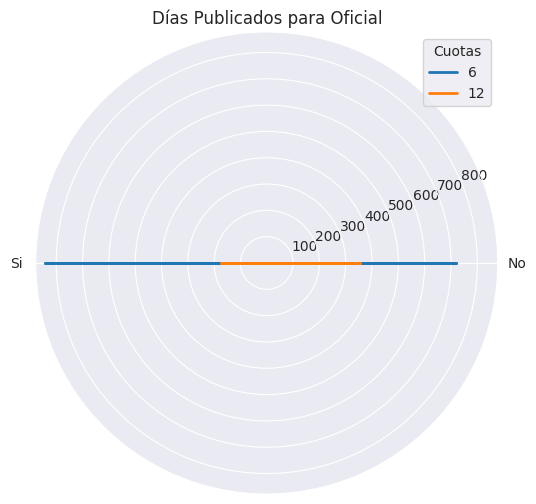

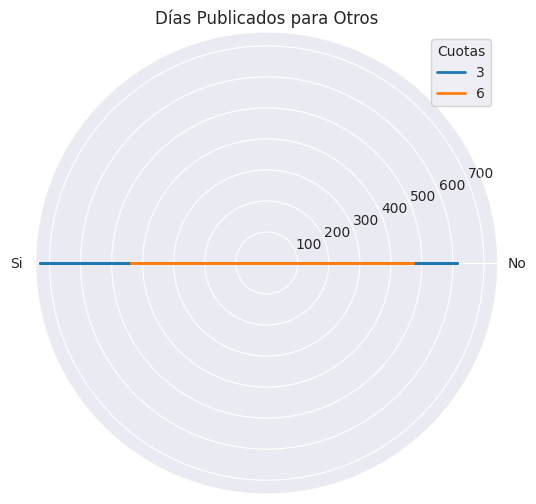

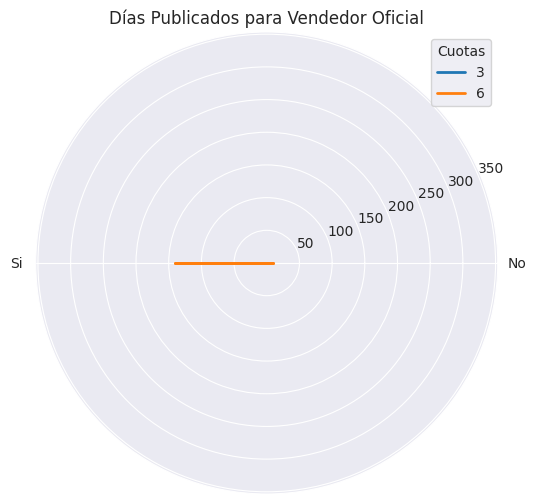

In [ ]:
# Calcular promedio de días publicados
avg_dias_publicados = df_maldon2.groupby(['T. Oficial', 'Cuotas', 'Envío Gratis'])['Días publicados'].mean().reset_index()

# Obtener valores únicos para T. Oficial, Cuotas y Envío Gratis
oficiales = avg_dias_publicados['T. Oficial'].unique()
cuotas = avg_dias_publicados['Cuotas'].unique()
envios = avg_dias_publicados['Envío Gratis'].unique()

# Crear graficos separados
for oficial in oficiales:
    # Filtrar datos
    data_oficial = avg_dias_publicados[avg_dias_publicados['T. Oficial'] == oficial]

    # Pivot para el formato de radar
    data_pivot = data_oficial.pivot_table(index='Cuotas', columns='Envío Gratis', values='Días publicados')

    # Obtener valores y columnas para el gráfico
    values = data_pivot.values.tolist()
    labels = data_pivot.columns.tolist()

    # Número de variables
    N = len(labels)

    # Angle of each axis in the plot
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Crear el gráfico de radar
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)

    # Plot the data
    ax.plot(angles, values[0] + values[0][:1], linewidth=2, label=data_pivot.index[0])  # Cuotas value 1
    ax.fill(angles, values[0] + values[0][:1], alpha=0.25)

    ax.plot(angles, values[1] + values[1][:1], linewidth=2, label=data_pivot.index[1])  # Cuotas value 2 (if available)
    ax.fill(angles, values[1] + values[1][:1], alpha=0.25)

    # Establecer los niveles y títulos
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title(f'Días Publicados para {oficial}')
    ax.grid(True)
    plt.legend(title='Cuotas')

    plt.show()

##10- Conclusión

De acuerdo a los calculos y gráficos que surgen del análisis del Dataframe, se observa que Maldon (Oficial) y los vendedores oficiales requieren más días publicados en promedio que los requeridos por otros vededores. A su vez las operaciones con envío gratis también requieren más días publicados que las ventas sin envíos. Por último, a mayor cantidad de cuotas menor es el tiempo promedio de publicado.
Es por lo antes expuesto que podemos concluir que la Hipótesis planteada no se cumple en su totalidad.